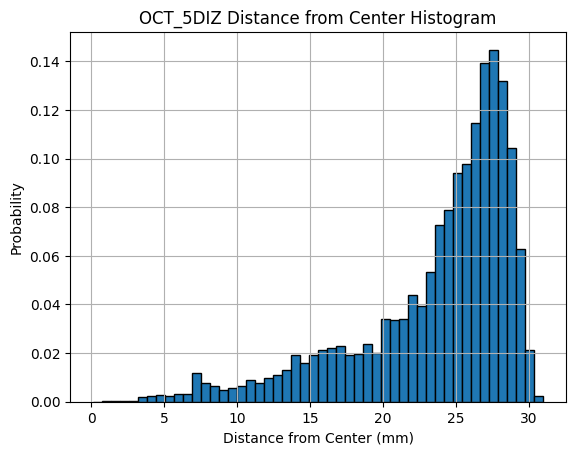

In [28]:
import os
import numpy as np
import pandas as pd

import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

from src import settings
from src.utils import fileio, data_utils

import numpy as np  
import matplotlib.pyplot as plt

def plot_2d_hiostogram(x_values_filtered, y_values_filtered, title):
    heatmap, xedges, yedges = np.histogram2d(x_values_filtered, y_values_filtered, bins=1000)
    heatmap = gaussian_filter(heatmap, sigma=4)
    # Plot the heatmap

    plt.axis('off')
    plt.imshow(heatmap.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap=cm.jet)
    # plt.colorbar(label='Count')
    # plt.xlabel('X values')
    # plt.ylabel('Y values')

    # fig.set_size_inches(7, 7)
    plt.tight_layout()
    # plt.title(f'{settings.TREATMENT}') #with gaussian filter
    plt.title(title) #with gaussian filter
    plt.show()


for TREATMENT in ["OCT_5DIZ"]: #"CsCh",  "LDA_5DIZ", "OCT_5DIZ"]:
# TREATMENT="Cs_5DIZ"
# INPUT_DIR = os.path.join(settings.OUTPUT_DIR, "0_0_preproc_data")
    INPUT_DIR = "/home/milky/drosophila-SNA/data/processed/0_0_preproc_data/" +TREATMENT

    trials = fileio.load_multiple_folders(INPUT_DIR)

    pos_x_treatment = np.array([])
    pos_y_treatment = np.array([])

    n = 24 * 60
    for group_name, group_path in trials.items():  

        if group_name == "wt_1":
            continue

        pos_x_group = np.array([])
        pos_y_group = np.array([])
        
        fly_dict=fileio.load_files_from_folder(group_path)
        for fly_name, fly_path in fly_dict.items():  
            df = pd.read_csv(fly_path, usecols=['pos x', 'pos y'])
            pos_x = df["pos x"].to_numpy()
            pos_y = df["pos y"].to_numpy()

            pos_x = pos_x[:n]
            pos_y = pos_y[:n]

            pos_x_group = np.concatenate((pos_x_group, pos_x))
            pos_y_group = np.concatenate((pos_y_group, pos_y))

            pos_x_treatment = np.concatenate((pos_x_treatment, pos_x))
            pos_y_treatment = np.concatenate((pos_y_treatment, pos_y))
        
        pos_x_group = pos_x_group[~np.isnan(pos_x_group)]
        pos_y_group = pos_y_group[~np.isnan(pos_y_group)]


    x_values_filtered = pos_x_treatment[~np.isnan(pos_x_treatment)]
    y_values_filtered = pos_y_treatment[~np.isnan(pos_y_treatment)]

    title=TREATMENT+" strain"
    # plot_2d_hiostogram(x_values_filtered, y_values_filtered, title)

    min_x, max_x = np.min(x_values_filtered), np.max(x_values_filtered)
    min_y, max_y = np.min(y_values_filtered), np.max(y_values_filtered)

    center_x = (max_x + min_x) / 2
    center_y = (max_y + min_y) / 2

    distances_from_center = np.sqrt((x_values_filtered - center_x)**2 + (y_values_filtered - center_y)**2)

    plt.hist(distances_from_center, bins=50, edgecolor='black', density=True)
    plt.title(TREATMENT + ' Distance from Center Histogram')
    plt.xlabel('Distance from Center (mm)')
    plt.ylabel('Probability')
    plt.grid(True)
    plt.show()


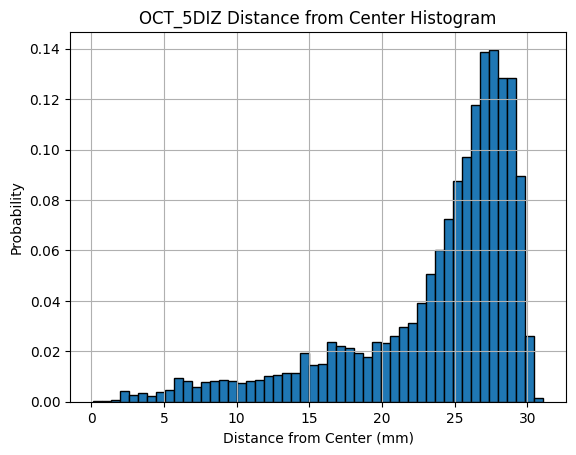

In [29]:
import os
import numpy as np
import pandas as pd

import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

from src import settings
from src.utils import fileio, data_utils

import numpy as np  
import matplotlib.pyplot as plt

def plot_2d_hiostogram(x_values_filtered, y_values_filtered, title):
    heatmap, xedges, yedges = np.histogram2d(x_values_filtered, y_values_filtered, bins=1000)
    heatmap = gaussian_filter(heatmap, sigma=4)
    # Plot the heatmap

    plt.axis('off')
    plt.imshow(heatmap.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap=cm.jet)
    # plt.colorbar(label='Count')
    # plt.xlabel('X values')
    # plt.ylabel('Y values')

    # fig.set_size_inches(7, 7)
    plt.tight_layout()
    # plt.title(f'{settings.TREATMENT}') #with gaussian filter
    plt.title(title) #with gaussian filter
    plt.show()


for TREATMENT in ["OCT_5DIZ"]: #"CsCh",  "LDA_5DIZ", "OCT_5DIZ"]:
# TREATMENT="Cs_5DIZ"
# INPUT_DIR = os.path.join(settings.OUTPUT_DIR, "0_0_preproc_data")
    INPUT_DIR = "/home/milky/drosophila-SNA/data/processed/0_0_preproc_data/" +TREATMENT

    trials = fileio.load_multiple_folders(INPUT_DIR)

    pos_x_treatment = np.array([])
    pos_y_treatment = np.array([])

    n = 24 * 60
    for group_name, group_path in trials.items():  

        if group_name == "wt_1":
            continue

        pos_x_group = np.array([])
        pos_y_group = np.array([])
        
        fly_dict=fileio.load_files_from_folder(group_path)
        for fly_name, fly_path in fly_dict.items():  
            df = pd.read_csv(fly_path, usecols=['pos x', 'pos y'])
            pos_x = df["pos x"].to_numpy()
            pos_y = df["pos y"].to_numpy()

            pos_x = pos_x[-n:]
            pos_y = pos_y[-n:]

            pos_x_group = np.concatenate((pos_x_group, pos_x))
            pos_y_group = np.concatenate((pos_y_group, pos_y))

            pos_x_treatment = np.concatenate((pos_x_treatment, pos_x))
            pos_y_treatment = np.concatenate((pos_y_treatment, pos_y))
        
        pos_x_group = pos_x_group[~np.isnan(pos_x_group)]
        pos_y_group = pos_y_group[~np.isnan(pos_y_group)]


    x_values_filtered = pos_x_treatment[~np.isnan(pos_x_treatment)]
    y_values_filtered = pos_y_treatment[~np.isnan(pos_y_treatment)]

    title=TREATMENT+" strain"
    # plot_2d_hiostogram(x_values_filtered, y_values_filtered, title)

    min_x, max_x = np.min(x_values_filtered), np.max(x_values_filtered)
    min_y, max_y = np.min(y_values_filtered), np.max(y_values_filtered)

    center_x = (max_x + min_x) / 2
    center_y = (max_y + min_y) / 2

    distances_from_center = np.sqrt((x_values_filtered - center_x)**2 + (y_values_filtered - center_y)**2)

    plt.hist(distances_from_center, bins=50, edgecolor='black', density=True)
    plt.title(TREATMENT + ' Distance from Center Histogram')
    plt.xlabel('Distance from Center (mm)')
    plt.ylabel('Probability')
    plt.grid(True)
    plt.show()
